In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from plot_params import *
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

basedir= Path('/tscc/nfs/home/hsher/scratch/ABC_2rep')
out_stem = 'K562_rep6'
out_stem2 = 'K562_rep4'
data = pd.read_csv(basedir /f'counts/genome/megatables/{out_stem}.tsv.gz', sep = '\t')
data2 = pd.read_csv(basedir /f'counts/genome/megatables/{out_stem2}.tsv.gz', sep = '\t')

ground_truth = pd.read_csv('Dan_multiplex1_K562_rep4.Dan_multiplex1_K562_rep6.reproducible_window.csv',
                          index_col = 0)
ground_truth_skipper = pd.read_csv('ABC_K562.skipper_reproducible_window.csv',
                          index_col = 0)

clusters = pd.read_csv(basedir /f'DMM/{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)

In [2]:
anno = pd.read_csv(basedir /f'DMM/{out_stem}.cluster_summary.csv', index_col = 0)

In [3]:
ground_truth_skipper.rename({'DDX3X': 'DDX3'}, axis = 1, inplace = True)

In [4]:
data = data.loc[data.sum(axis = 1)>10]
data.index = data.index+1
data2 = data2.loc[data2.sum(axis = 1)>10]
data2.index = data2.index+1

In [5]:
single_assignment = ground_truth.loc[ground_truth.sum(axis = 1)==1]
category = pd.from_dummies(single_assignment)
category.index = single_assignment.index

In [6]:
single_assignment = ground_truth_skipper.loc[ground_truth_skipper.sum(axis = 1)==1]
category_eclip = pd.from_dummies(single_assignment)
category_eclip.index = single_assignment.index

In [7]:
data_norm = data.div(data.sum(axis = 1), axis = 0)
data2_norm = data.div(data.sum(axis = 1), axis = 0)

In [8]:
X = data_norm
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, index = data.index, columns = ['pca1','pca2'])
#X_transformed = X_transformed.merge(ground_truth_skipper, left_index = True, right_index = True, how = 'left')
X_transformed['eCLIP']=category_eclip
X_transformed['ABC(CLIPper+CC)']=category

In [9]:
anno['RBP'].dropna().unique()

array(['IGF2BP2,FAM120A', 'IGF2BP2,PRPF8', 'IGF2BP2',
       'IGF2BP2,PUM2,FAM120A', 'RBFOX2,FAM120A', 'RBFOX2,PRPF8,SF3B4',
       'RBFOX2,PRPF8', 'RBFOX2', 'PUM2,ZC3H11A', 'PUM2,FAM120A',
       'FAM120A,PRPF8', 'FAM120A,DDX3', 'FAM120A,LIN28B', 'FAM120A',
       'FAM120A,ZC3H11A', 'DDX3,EIF3G', 'DDX3', 'ZC3H11A,PRPF8',
       'ZC3H11A', 'PRPF8,SF3B4', 'PRPF8', 'PRPF8,LIN28B', 'LIN28B',
       'SF3B4'], dtype=object)

In [10]:
color_dict = dict(zip(X_transformed['eCLIP'].dropna().unique(),
                     ['pink', 'tomato', 'peachpuff', 'gold', 'lightgreen',
                      'seagreen', 'lightskyblue', 'royalblue', 'orchid', 'slateblue']
                     
                     )
                 )

In [11]:
multirbp = [i for i in anno['RBP'].dropna().unique() if ',' in i]

In [12]:
from matplotlib.cm import nipy_spectral

def get_n_colors(n):
    return[ nipy_spectral(float(i)/n) for i in range(n) ]

colors = get_n_colors(len(multirbp))

In [13]:
color_dict_multi = dict(zip(multirbp,colors))

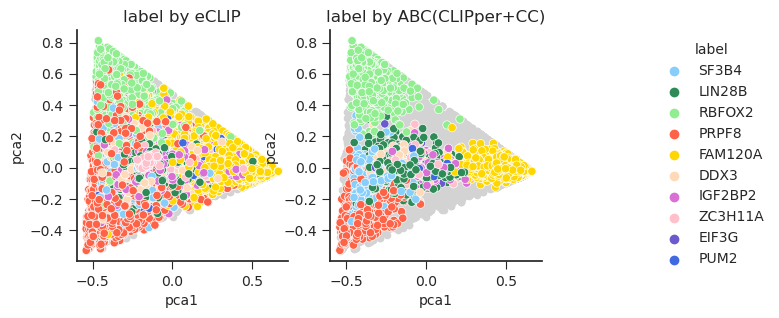

In [14]:
f, ax = plt.subplots(1,2, figsize = (6,3))
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_transformed.loc[X_transformed[col].isnull()].plot.scatter('pca1', 'pca2', ax = ax[0], color = 'lightgrey')
sns.scatterplot(x='pca1', y='pca2', data=X_transformed, hue=col, ax = ax[0], palette = color_dict, legend = False)
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label by {col}')
ax[0].set_title(f'label by {col}')
sns.despine()

col = 'ABC(CLIPper+CC)'
X_transformed.loc[X_transformed[col].isnull()].plot.scatter('pca1', 'pca2', ax = ax[1], color = 'lightgrey')
sns.scatterplot(data=X_transformed, x = 'pca1', y ='pca2', hue=col, ax = ax[1], palette = color_dict)
ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[1].set_title(f'label by {col}')
sns.despine()
plt.savefig(figdir/'PCA_plots.pdf')
 

In [15]:
data_norm.shape

(138499, 10)

In [16]:
clusters['anno']=clusters['BF_assignment'].map(anno['RBP'])

In [17]:
sample_by_category = []
for name, group in clusters.fillna('').groupby(by = 'anno'):
    size = group.shape[0]
    sampled = group.sample(frac = 0.05).index.tolist()
    if len(sampled)==0:
        sampled = group.index.tolist()
    sample_by_category += sampled
    print(name, len(sampled))

 4273
DDX3 187
DDX3,EIF3G 12
FAM120A 778
FAM120A,DDX3 6
FAM120A,LIN28B 47
FAM120A,PRPF8 18
FAM120A,ZC3H11A 29
IGF2BP2 86
IGF2BP2,FAM120A 200
IGF2BP2,PRPF8 25
IGF2BP2,PUM2,FAM120A 4
LIN28B 156
PRPF8 482
PRPF8,LIN28B 57
PRPF8,SF3B4 67
PUM2,FAM120A 10
PUM2,ZC3H11A 6
RBFOX2 273
RBFOX2,FAM120A 8
RBFOX2,PRPF8 31
RBFOX2,PRPF8,SF3B4 1
SF3B4 77
ZC3H11A 62
ZC3H11A,PRPF8 35


In [18]:

X = data_norm.loc[sample_by_category]
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded, index = X.index, columns = ['t-SNE1', 't-SNE2'])
X_embedded['ABC(CLIPper+CC)']=category
X_embedded['eCLIP']=category_eclip

In [19]:
clusters['anno']=clusters['BF_assignment'].map(anno['RBP'])
X_embedded['solitary_cluster']=clusters.loc[~clusters['anno'].fillna('').str.contains(','), 'anno']
X_embedded['combinatorial_cluster']=clusters.loc[clusters['anno'].fillna('').str.contains(','), 'anno']

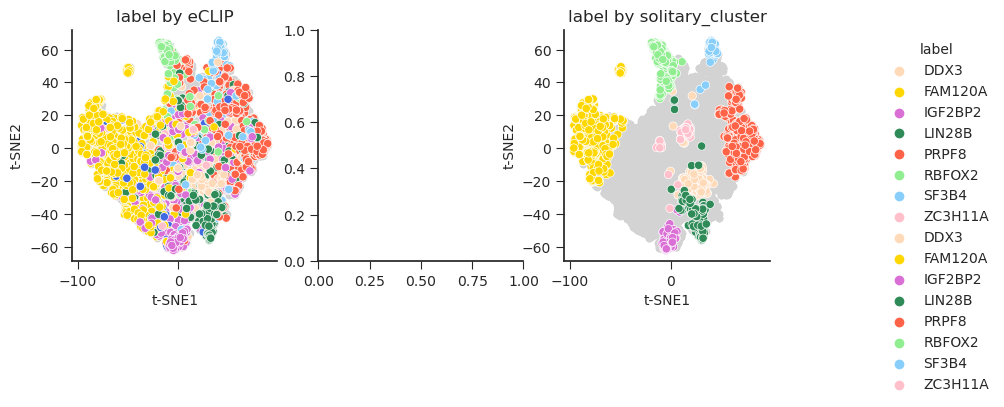

In [20]:
f, ax = plt.subplots(1,3, figsize = (9,3))
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[0], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[0], palette = color_dict, legend = False)
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label by {col}')
ax[0].set_title(f'label by {col}')
sns.despine()

# col = 'ABC(CLIPper+CC)'
# X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[1], color = 'lightgrey')
# sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[1], palette = color_dict)
# ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
# ax[1].set_title(f'label by {col}')
# sns.despine()
# #plt.savefig(figdir/'tSNE_plots.pdf')
 
col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict)
ax[2].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[2].set_title(f'label by {col}')
sns.despine()
#plt.savefig(figdir/'tSNE_plots.pdf')

col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict)
ax[2].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[2].set_title(f'label by {col}')
sns.despine()
#plt.savefig(figdir/'tSNE_plots.pdf')


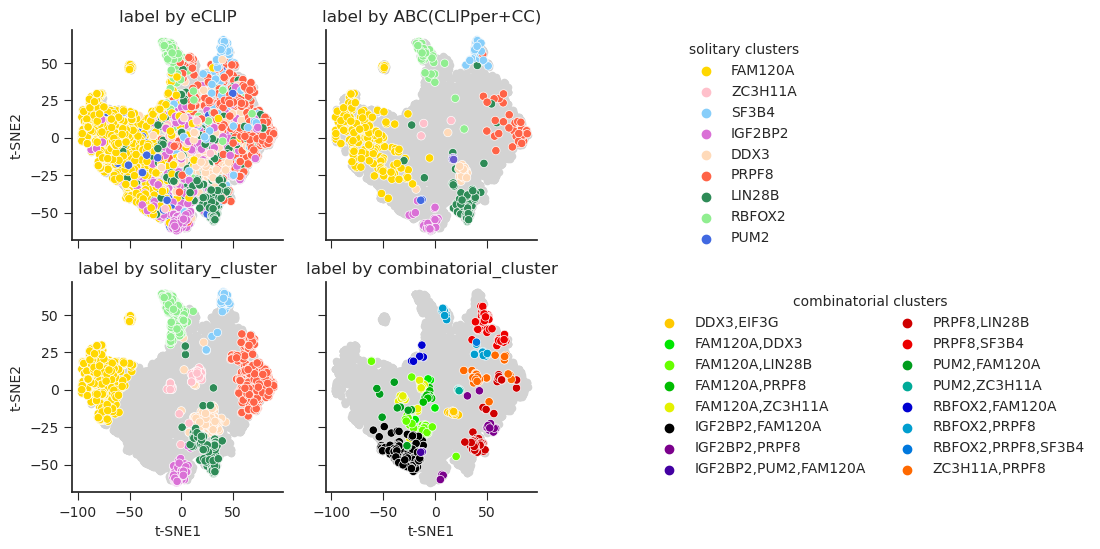

In [21]:
f, ax = plt.subplots(2,2, figsize = (6,6), sharex = True, sharey = True)
ax = ax.flatten()
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[0], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[0], palette = color_dict, legend = True)
ax[0].legend(bbox_to_anchor = (3.5, 1), title = f'solitary clusters')
ax[0].set_title(f'label by {col}')
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label')
sns.despine()

col = 'ABC(CLIPper+CC)'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[1], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[1], palette = color_dict, legend = False)
#ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[1].set_title(f'label by {col}')
sns.despine()

 
col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict, legend = False)
ax[2].set_title(f'label by {col}')
sns.despine()


col = 'combinatorial_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[3], color = 'lightgrey')
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=X_embedded, hue=col, ax = ax[3], palette = color_dict_multi, marker = 'o')
ax[3].legend(bbox_to_anchor = (1.5, 1), title = f'combinatorial clusters', ncol = 2)
ax[3].set_title(f'label by {col}')
sns.despine()
plt.savefig(figdir/'tSNE_plots.pdf')